# **Reinforcement learning for stock marketing strategy forecast**

# 1. Introduction

This project focuses on developing an effective stock market trading strategy
using Reinforcement Learning (RL). The RL-based model learns directly from historical price data and technical indicators, continuously adapting its policy to evolving market conditions.

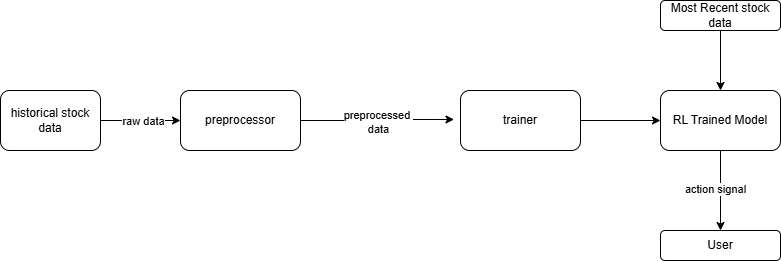

The ultimate goal is to train an RL agent capable of analyzing real-time stock data and generating optimal trading signals—buy, sell, or hold—to maximize returns while managing risks.




### 1.1 Motivation and Business Value

In the ever-evolving stock market, traditional quantitative trading strategies often rely on fixed rules or purely statistical models, making them slow to adapt to sudden market regime changes. These methods typically assume stationarity in market behavior, which can lead to suboptimal performance during periods of high volatility, economic shocks, or shifts in investor sentiment.

To address these limitations, a real-time reinforcement learning (RL)–based decision-making model offers a more adaptive approach. Unlike conventional models, RL agents continuously learn and refine their trading strategies by interacting with the market environment, adjusting to new patterns, and optimizing decisions based on reward feedback. This adaptability enables the model to capture evolving trends, hedge against risks dynamically, and exploit market inefficiencies more effectively than static rule-based strategies.

By leveraging reinforcement learning techniques, this project aims to develop a robust and intelligent trading framework that dynamically responds to market fluctuations, improving profitability and risk management in real-world trading scenarios.

The business value of an RL-based trading system lies in its ability to generate higher risk-adjusted returns, minimize losses, automate trading processes, and adapt to complex market conditions in real time. This makes it a powerful tool for hedge funds, proprietary trading firms, and institutional investors looking for a competitive edge in financial markets.

**1. Decisions to be Impacted**  
- **Market Timing**: Leverage Yahoo finance with RL to determine optimal buy/sell points.  
- **Risk Management**: Adjust exposure during volatility or uncertainty, potentially using hedging.  
- **Portfolio Allocation**: Use model signals to allocate capital across multiple assets, aiming for higher returns and stability.

**2. Business Value**  
- **Higher Potential Returns**: Model-driven forecasts can capture major price swings to boost profits.  
- **Improved Risk/Reward**: Balances return maximization with controlled risk through continuous learning.  
- **Scalability**: A validated strategy on one asset can be extended to ETFs, futures, or crypto.  
- **Efficiency Gains**: Automates repetitive analysis, freeing teams for more strategic research.

**3. Why Care About This Project?**  
- **Industry Trend**: Reflects rising demand for AI-driven trading and digital finance.  
- **Practical & Technical Fusion**: Combines RL, time-series analysis, and engineering practices end-to-end.  
- **Balancing Risk & Profit**: Addresses how to maximize gains while minimizing drawdowns in uncertain markets.  
- **Ongoing Innovation**: Framework can evolve with new data sources, algorithms (e.g., A2C/PPO), or asset classes.


# 2. Data and Data Preprocessing

### 2.0 Data Assets Selection

\- Primary Data Source: Yahoo Finance.

\- Data Source Comparison

| **Data Source** | **Features /Strengths** | **Selection/Exclusion Reason**                                                 |
|-----------------------|-----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Yahoo Finance** | - Free and easily accessible<br>- Wide market coverage<br>- Supported by `yfinance` library<br>- Strong community support | **Primary Source:** Meets daily and longer-term analysis needs|
| **Google Finance** | - Free<br>- Clean interface<br>- Can serve as a backup | **Backup:** Lacks official API support and stability compared to Yahoo Finance |
| **Alpha Vantage** | - Rich data types<br>- Offers free API (with limits)<br>- Clear documentation | **Not Used:** Requires paid access for deeper/more real-time data |
| **Quandl** | - Provides professional data sets<br>- Covers macroeconomic and industry data | **Not Used:** Advanced data access requires a subscription |
| **WRDS** | - Academic-grade database<br>- Highly authoritative data (e.g., CRSP, Compustat) | **Not Used:** Only available to business school students at WashU |<br>-


\- For this project, all further analysis will be based on Yahoo Finance data.


#### 2.0.1 Setup & Dependencies

In [ ]:
!pip install pandas

In [ ]:
!pip install yfinance ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=f786445ec37ba1d173d396e5bf8524d4bf3f915d9759a1c1f48e907000352ec0
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
!pip install matplotlib

### 2.1 Get Data

In [ ]:
import requests
import pandas as pd
import time
import yfinance as yf
import ta  # Library for technical analysis
import matplotlib.pyplot as plt

In [ ]:
# Get AAPL data for the last 10 years
apple = yf.download("AAPL", start="2014-01-01", end="2024-01-01", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.215366,17.336748,17.180820,17.294732,234684800
2014-01-03,16.837221,17.233112,16.820102,17.206969,392467600
2014-01-06,16.929029,17.018353,16.607523,16.727349,412610800
2014-01-07,16.807964,16.992215,16.741983,16.941173,317209200
2014-01-08,16.914402,16.979760,16.765943,16.769676,258529600


### 2.2 Data Preprocessing



#### **2.2.1 Remove the "Ticker" Level from the Column Index**

In this step, we flatten the DataFrame’s multi-level column structure returned by Yahoo Finance. By dropping the “Ticker” level, we retain only the primary fields (e.g., **Open, High, Low, Close, Volume**), ensuring the column structure is simpler and more convenient for subsequent transformations.



In [ ]:
# Remove the "Ticker" level from the column names
apple.columns = apple.columns.droplevel(1)
print(apple.head())

Price           Close       High        Low       Open     Volume
Date                                                             
2014-01-02  17.215366  17.336748  17.180820  17.294732  234684800
2014-01-03  16.837221  17.233112  16.820102  17.206969  392467600
2014-01-06  16.929029  17.018353  16.607523  16.727349  412610800
2014-01-07  16.807964  16.992215  16.741983  16.941173  317209200
2014-01-08  16.914402  16.979760  16.765943  16.769676  258529600


#### **2.2.2 Feature Engineering: Add Technical Indicators**

#### **1. Relative Strength Index (RSI)**

##### **Definition**
The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements. It ranges from **0 to 100**, helping traders identify **overbought** and **oversold** conditions.

##### **Formula**
The RSI is calculated using the following formula:

$$
RSI = 100 - \left( \frac{100}{1 + RS} \right)
$$

where:
- $$ RS = \frac{\text{Average Gain over N periods}}{\text{Average Loss over N periods}} $$
- The default **N-period** is **14 days**.

##### **Calculation Steps**
1. **Calculate Daily Gains and Losses**  
   - Gain = Current Close - Previous Close (if positive, otherwise 0)  
   - Loss = Previous Close - Current Close (if negative, otherwise 0)  
2. **Compute Average Gain & Loss over 14 periods**  
   - First 14 periods: Simple moving average (SMA) of gains & losses.  
   - After 14 periods: Use a **smoothed moving average**:
     $$
     \text{New Average Gain} = \frac{\text{Previous Average Gain} \times 13 + \text{Current Gain}}{14}
     $$
     $$
     \text{New Average Loss} = \frac{\text{Previous Average Loss} \times 13 + \text{Current Loss}}{14}
     $$
3. **Calculate RS and RSI**
   - $$ RS = \frac{\text{Average Gain}}{\text{Average Loss}} $$
   - $$ RSI = 100 - \left( \frac{100}{1 + RS} \right) $$

##### **Interpretation**
- **RSI > 70** → Overbought (Price may drop)
- **RSI < 30** → Oversold (Price may rise)
- **RSI between 30-70** → Neutral (No strong trend)

---

#### **2. Moving Average Convergence Divergence (MACD)**

##### **Definition**
The **Moving Average Convergence Divergence (MACD)** is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

##### **Formula**
$$
MACD = EMA_{12} - EMA_{26}
$$

where:
- **EMA₁₂** = 12-day Exponential Moving Average (fast EMA)
- **EMA₂₆** = 26-day Exponential Moving Average (slow EMA)

Additional components:
- **MACD Signal Line** = 9-day EMA of MACD
- **MACD Histogram** = MACD - MACD Signal

##### **Calculation Steps**
1. **Calculate 12-day EMA**  
   $$
   EMA_t = \left( \frac{\mathrm{Close}_{\,\,t} \times \alpha} {1 + \alpha} \right) + \left( EMA_{t-1} \times (1 - \alpha) \right)
   $$
   where $$ \alpha = \frac{2}{N+1} $$, and \( N = 12 \).
   
2. **Calculate 26-day EMA** using the same formula.

3. **Calculate MACD Line**  
   $$
   MACD = EMA_{12} - EMA_{26}
   $$

4. **Calculate MACD Signal Line**  
   - 9-day EMA of MACD

5. **Calculate MACD Histogram**  
   - MACD Histogram = MACD Line - Signal Line

##### **Interpretation**
- **MACD > Signal Line** → Bullish (Uptrend)
- **MACD < Signal Line** → Bearish (Downtrend)
- **MACD Histogram > 0** → Positive momentum increasing
- **MACD Histogram < 0** → Negative momentum increasing

##### **MACD Crossovers**
- **Bullish Crossover**: MACD crosses **above** the signal line → **Buy Signal**
- **Bearish Crossover**: MACD crosses **below** the signal line → **Sell Signal**

---


In [ ]:
# Ensure "Close" column is a Series
apple["Close"] = apple["Close"].astype(float)

# Calculate RSI
rsi_indicator = ta.momentum.RSIIndicator(close=apple["Close"].squeeze(), window=14)
apple["RSI_14"] = rsi_indicator.rsi()

# Calculate MACD
macd = ta.trend.MACD(close=apple["Close"].squeeze(), window_slow=26, window_fast=12, window_sign=9)
apple["MACD"] = macd.macd()
apple["MACD_Signal"] = macd.macd_signal()
apple["MACD_Hist"] = macd.macd_diff()

# Save to CSV
csv_filename = "apple_stock_data_with_indicators.csv"
apple.to_csv(csv_filename)

# Show first few rows
print(apple.head())

# Output the file location
print(f"Data saved successfully to {csv_filename}")

Price           Close       High        Low       Open     Volume  RSI_14  \
Date                                                                        
2014-01-02  17.215366  17.336748  17.180820  17.294732  234684800     NaN   
2014-01-03  16.837221  17.233112  16.820102  17.206969  392467600     NaN   
2014-01-06  16.929029  17.018353  16.607523  16.727349  412610800     NaN   
2014-01-07  16.807964  16.992215  16.741983  16.941173  317209200     NaN   
2014-01-08  16.914402  16.979760  16.765943  16.769676  258529600     NaN   

Price       MACD  MACD_Signal  MACD_Hist  
Date                                      
2014-01-02   NaN          NaN        NaN  
2014-01-03   NaN          NaN        NaN  
2014-01-06   NaN          NaN        NaN  
2014-01-07   NaN          NaN        NaN  
2014-01-08   NaN          NaN        NaN  
Data saved successfully to apple_stock_data_with_indicators.csv


#### **2.2.3 Remove Initial NaN Rows**

After computing the RSI and MACD indicators, the first few rows often contain missing values (`NaN`) due to the rolling window calculations. To ensure we only work with valid data, we remove these initial `NaN` rows. This step helps maintain data integrity before training our RL model or performing further analysis.


In [ ]:
# Remove rows that contain NaN (usually at the start)
apple.dropna(inplace=True)

# Save to CSV
csv_filename = "apple_stock_data_with_indicators_after_preprocess.csv"
apple.to_csv(csv_filename)

# Show first few rows
print(apple.head(10))

# Output the file location
print(f"Data saved successfully to {csv_filename}")

Price           Close       High        Low       Open     Volume     RSI_14  \
Date                                                                           
2014-02-20  16.630226  16.813389  16.562910  16.687836  305858000  49.737129   
2014-02-21  16.445496  16.737303  16.425144  16.681571  278784800  45.966828   
2014-02-24  16.517511  16.591717  16.356894  16.379750  288909600  47.633397   
2014-02-25  16.345617  16.580753  16.312429  16.574806  231952000  44.134292   
2014-02-26  16.198147  16.437667  16.143355  16.394147  276217200  41.329295   
2014-02-27  16.521267  16.556020  16.157446  16.191574  301882000  48.980594   
2014-02-28  16.476494  16.680321  16.347496  16.565412  371968800  48.045607   
2014-03-03  16.524086  16.614571  16.369102  16.388201  238781200  49.156619   
2014-03-04  16.633043  16.676878  16.524399  16.625530  259140000  51.702993   
2014-03-05  16.668116  16.742945  16.566984  16.623030  200062800  52.527180   

Price           MACD  MACD_Signal  MACD

#### **2.2.4 Data Classification by Level of Measurement**

Below is a classification of the dataset’s columns according to the four levels of measurement (Nominal, Ordinal, Interval, Ratio):

1. **Date**  
   - **Level:** Interval  

2. **Open, High, Low, Close, Volume**  
   - **Level:** Ratio  
   - **Reason:** These are continuous numeric variables with a true zero point. A zero value denotes “none”, and values can be meaningfully compared in terms of multiples (e.g., one price being double another).

3. **RSI_14, MACD, MACD_Signal, MACD_Hist**  
   - **Level:** Interval  
   - **Reason:** These technical indicators can be positive or negative (or within a certain range, like RSI from 0 to 100). Zero here does not represent a total absence, and we cannot make valid “twice as much” comparisons.


### 2.3 Data Cleaning Metrics

1. **Load and Set Date Index**  
   Use the `parse_dates` parameter to convert the “Date” column into a `datetime` type and set it as the DataFrame’s index. This facilitates time-series analysis and ensures proper date ordering.

2. **Check Index Order**  
   Use `df.index.is_monotonic_increasing` to verify whether the dates are in strictly ascending order. If it returns `False`, you may need to reorder the DataFrame or investigate potential data anomalies.

3. **Duplicate Detection**  
   Call `df.duplicated().sum()` to identify the number of duplicated rows. This helps avoid modeling biases or data leakage when rows are repeated in merged datasets.

4. **Inspect Data Types and Structure**  
   Use `df.info()` to confirm that each column’s type (e.g., float, int) matches expectations. If there are mismatches or additional missing values, further cleaning or conversions may be required.

5. **Statistical Description**  
   By calling `df.describe()`, you can observe the value range, mean, and quartiles of each column. If you detect extreme outliers, consider whether additional cleaning or labeling steps are needed.

First 5 rows of the dataset:
                 Close       High        Low       Open     Volume     RSI_14  \
Date                                                                           
2014-02-20  16.630226  16.813389  16.562910  16.687836  305858000  49.737129   
2014-02-21  16.445496  16.737303  16.425144  16.681571  278784800  45.966828   
2014-02-24  16.517511  16.591717  16.356894  16.379750  288909600  47.633397   
2014-02-25  16.345617  16.580753  16.312429  16.574806  231952000  44.134292   
2014-02-26  16.198147  16.437667  16.143355  16.394147  276217200  41.329295   

                MACD  MACD_Signal  MACD_Hist  
Date                                          
2014-02-20  0.028622    -0.074476   0.103097  
2014-02-21  0.008856    -0.057809   0.066665  
2014-02-24 -0.000986    -0.046445   0.045458  
2014-02-25 -0.022398    -0.041635   0.019237  
2014-02-26 -0.050683    -0.043445  -0.007238  

Is the Date index monotonic increasing? True
Earliest date in DF: 2014-02-20 00

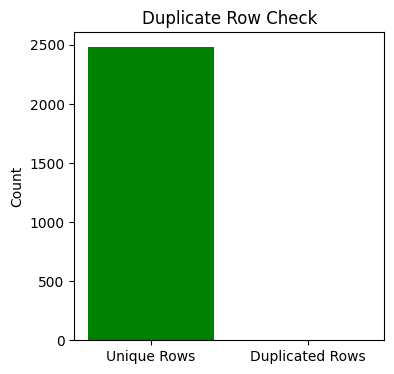


Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2483 entries, 2014-02-20 to 2023-12-29
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        2483 non-null   float64
 1   High         2483 non-null   float64
 2   Low          2483 non-null   float64
 3   Open         2483 non-null   float64
 4   Volume       2483 non-null   int64  
 5   RSI_14       2483 non-null   float64
 6   MACD         2483 non-null   float64
 7   MACD_Signal  2483 non-null   float64
 8   MACD_Hist    2483 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 194.0 KB
None


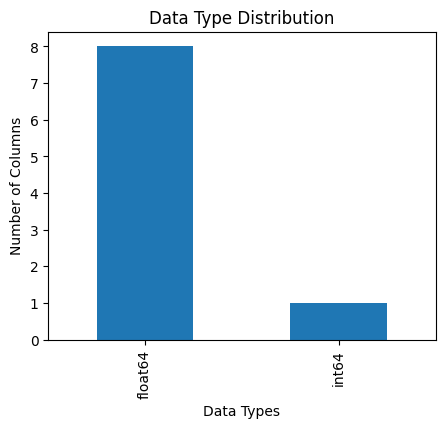


Descriptive Statistics:
             Close         High          Low         Open        Volume  \
count  2483.000000  2483.000000  2483.000000  2483.000000  2.483000e+03   
mean     76.314256    77.083473    75.469087    76.250821  1.334117e+08   
std      56.353089    56.933400    55.710349    56.298112  7.770033e+07   
min      16.198147    16.315244    16.009672    16.191574  2.404830e+07   
25%      27.606549    27.820521    27.383333    27.609146  8.084015e+07   
50%      46.794849    47.321323    46.354655    46.857227  1.113809e+08   
75%     133.007256   134.119274   131.025556   132.741030  1.647986e+08   
max     196.927658   198.428641   195.824294   196.838199  7.599116e+08   

            RSI_14         MACD  MACD_Signal    MACD_Hist  
count  2483.000000  2483.000000  2483.000000  2483.000000  
mean     55.875642     0.488708     0.484627     0.004081  
std      12.984319     1.795115     1.682960     0.554626  
min      21.029900    -6.511137    -5.672586    -2.454338  

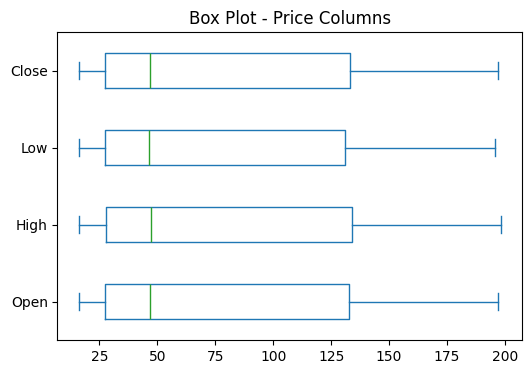

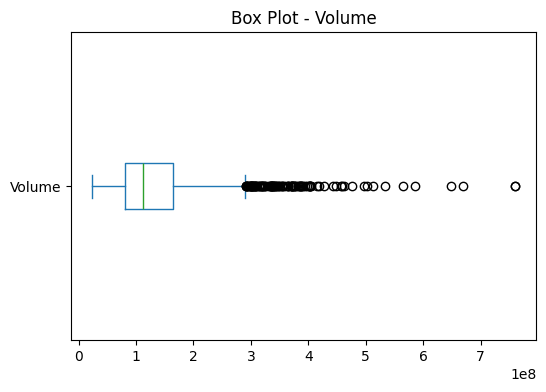

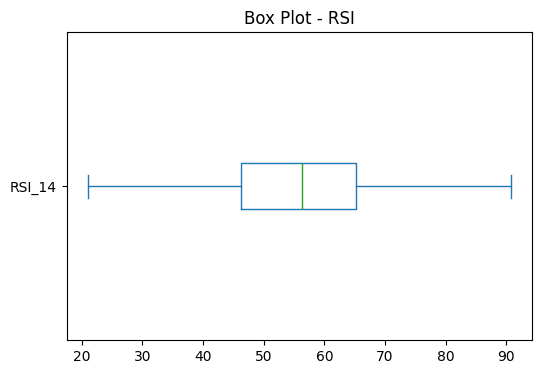

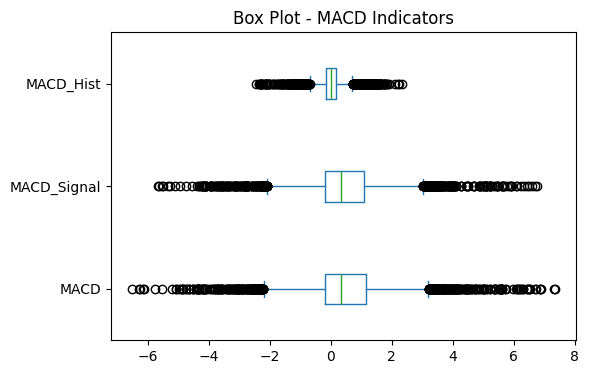

In [ ]:
# 1) Load and Set Date Index
df = pd.read_csv("apple_stock_data_with_indicators_after_preprocess.csv", parse_dates=["Date"], index_col="Date")
print("First 5 rows of the dataset:\n", df.head())

# 2) Check Index Order
print("\nIs the Date index monotonic increasing?", df.index.is_monotonic_increasing)
print("Earliest date in DF:", df.index.min())
print("Latest date in DF:", df.index.max())

# 3) Duplicate Detection
dup_count = df.duplicated().sum()
unique_count = len(df) - dup_count

# Plot duplicates vs unique rows for presentation
plt.figure(figsize=(4,4))
plt.bar(["Unique Rows","Duplicated Rows"], [unique_count, dup_count], color=["green","red"])
plt.title("Duplicate Row Check")
plt.ylabel("Count")
plt.show()

# 4) Inspect Data Types and Structure
print("\nData Info:")
print(df.info())

# Visualize data type distribution
dtype_counts = df.dtypes.value_counts()
dtype_counts.plot(kind='bar', figsize=(5,4), title="Data Type Distribution")
plt.xlabel("Data Types")
plt.ylabel("Number of Columns")
plt.show()

# 5) Statistical Description
print("\nDescriptive Statistics:")
print(df.describe())

# Group columns by their scale or purpose
price_cols = ['Open','High','Low','Close']
volume_col = ['Volume']  # Single-column list
indicator_cols = ['RSI_14','MACD','MACD_Signal','MACD_Hist']

# 1) Plot boxplot for price columns
df[price_cols].plot(kind='box', figsize=(6,4), vert=False)
plt.title("Box Plot - Price Columns")
plt.show()

# 2) Plot boxplot for volume (separate scale)
df[volume_col].plot(kind='box', figsize=(6,4), vert=False)
plt.title("Box Plot - Volume")
plt.show()

# 3) RSI
rsi_col = ['RSI_14']
df[rsi_col].plot(kind='box', figsize=(6,4), vert=False)
plt.title("Box Plot - RSI")
plt.show()

# 4) MACD-related indicators
macd_cols = ['MACD','MACD_Signal','MACD_Hist']
df[macd_cols].plot(kind='box', figsize=(6,4), vert=False)
plt.title("Box Plot - MACD Indicators")
plt.show()

### 2.4 Normalization -- calculate the day-on-day

In this step, we measure day-to-day changes in the Open, Close, High, Low, and
Volume columns to capture daily volatility. The resulting percentage growth
columns facilitate relative comparisons across different periods.

In [ ]:
# Calculating day-to-day percentage growth for OCHLV
df['Open_Growth'] = df['Open'].pct_change()
df['Close_Growth'] = df['Close'].pct_change()
df['High_Growth'] = df['High'].pct_change()
df['Low_Growth'] = df['Low'].pct_change()
df['Volume_Growth'] = df['Volume'].pct_change()
df = df.dropna()

In [ ]:
df.head()

,Close,High,Low,Open,Volume,RSI_14,MACD,MACD_Signal,MACD_Hist,Open_Growth,Close_Growth,High_Growth,Low_Growth,Volume_Growth
Date,,,,,,,,,,,,,,
2014-02-21,16.445496,16.737303,16.425144,16.681571,278784800,45.966828,0.008856,-0.057809,0.066665,-0.000375,-0.011108,-0.004525,-0.008318,-0.088516
2014-02-24,16.517511,16.591717,16.356894,16.379750,288909600,47.633397,-0.000986,-0.046445,0.045458,-0.018093,0.004379,-0.008698,-0.004155,0.036318
2014-02-25,16.345617,16.580753,16.312429,16.574806,231952000,44.134292,-0.022398,-0.041635,0.019237,0.011908,-0.010407,-0.000661,-0.002718,-0.197147
2014-02-26,16.198147,16.437667,16.143355,16.394147,276217200,41.329295,-0.050683,-0.043445,-0.007238,-0.010900,-0.009022,-0.008630,-0.010365,0.190838
2014-02-27,16.521267,16.556020,16.157446,16.191574,301882000,48.980594,-0.046490,-0.044054,-0.002436,-0.012356,0.019948,0.007200,0.000873,0.092915


### 2.5 MDPP (Minimal Distance/Percentage Principle)--Outlier detection

To further reduce noise while retaining the overall price trend, we adopt the **MDPP (Minimal Distance/Percentage Principle)** from the paper  
*Landmarks: A New Model for Similarity-Based Pattern Querying in Time Series Databases.*  

**Core Idea**  
1. **Identify potential landmarks** (local maxima or minima) in the “Close” price series.  
   - “^” marks local peaks  
   - “v” marks local troughs  
2. **Eliminate insignificant landmarks** based on two thresholds:  
   - **Distance (D)**: The number of days (index difference) between two adjacent landmarks.  
   - **Percentage (P)**: The relative price difference between these two landmarks.  
3. By removing pairs of closely spaced peaks/troughs that have small price differences, we effectively smooth out minor fluctuations (noise) without discarding the entire dataset.

#### 2.4.1 MDPP Algorithm

##### Landmark

- **Definition**: An *n-th order landmark* of a curve is a point where the n-th order derivative is 0.
- **1st-order landmark**: Local maxima and local minima
- **2nd-order landmark**: Inflection points  
- *(In this discussion, we only focus on first-order landmarks.)*

---

**Given**:
1. A sequence of landmarks $$(x_1, y_1), \ldots, (x_n, y_n)$$
2. A minimal distance \(D\)  
3. A minimal percentage \(P\)

**Then**:  
Remove the landmarks $$(x_i, y_i)$$ and $$(x_{i+1}, y_{i+1})$$ **if**:

$$
x_{i+1} - x_i < D
\quad \text{and} \quad
\frac{\lvert y_{i+1} - y_i \rvert}{\bigl(\lvert y_i \rvert + \lvert y_{i+1} \rvert\bigr)/2} < P.
$$

---

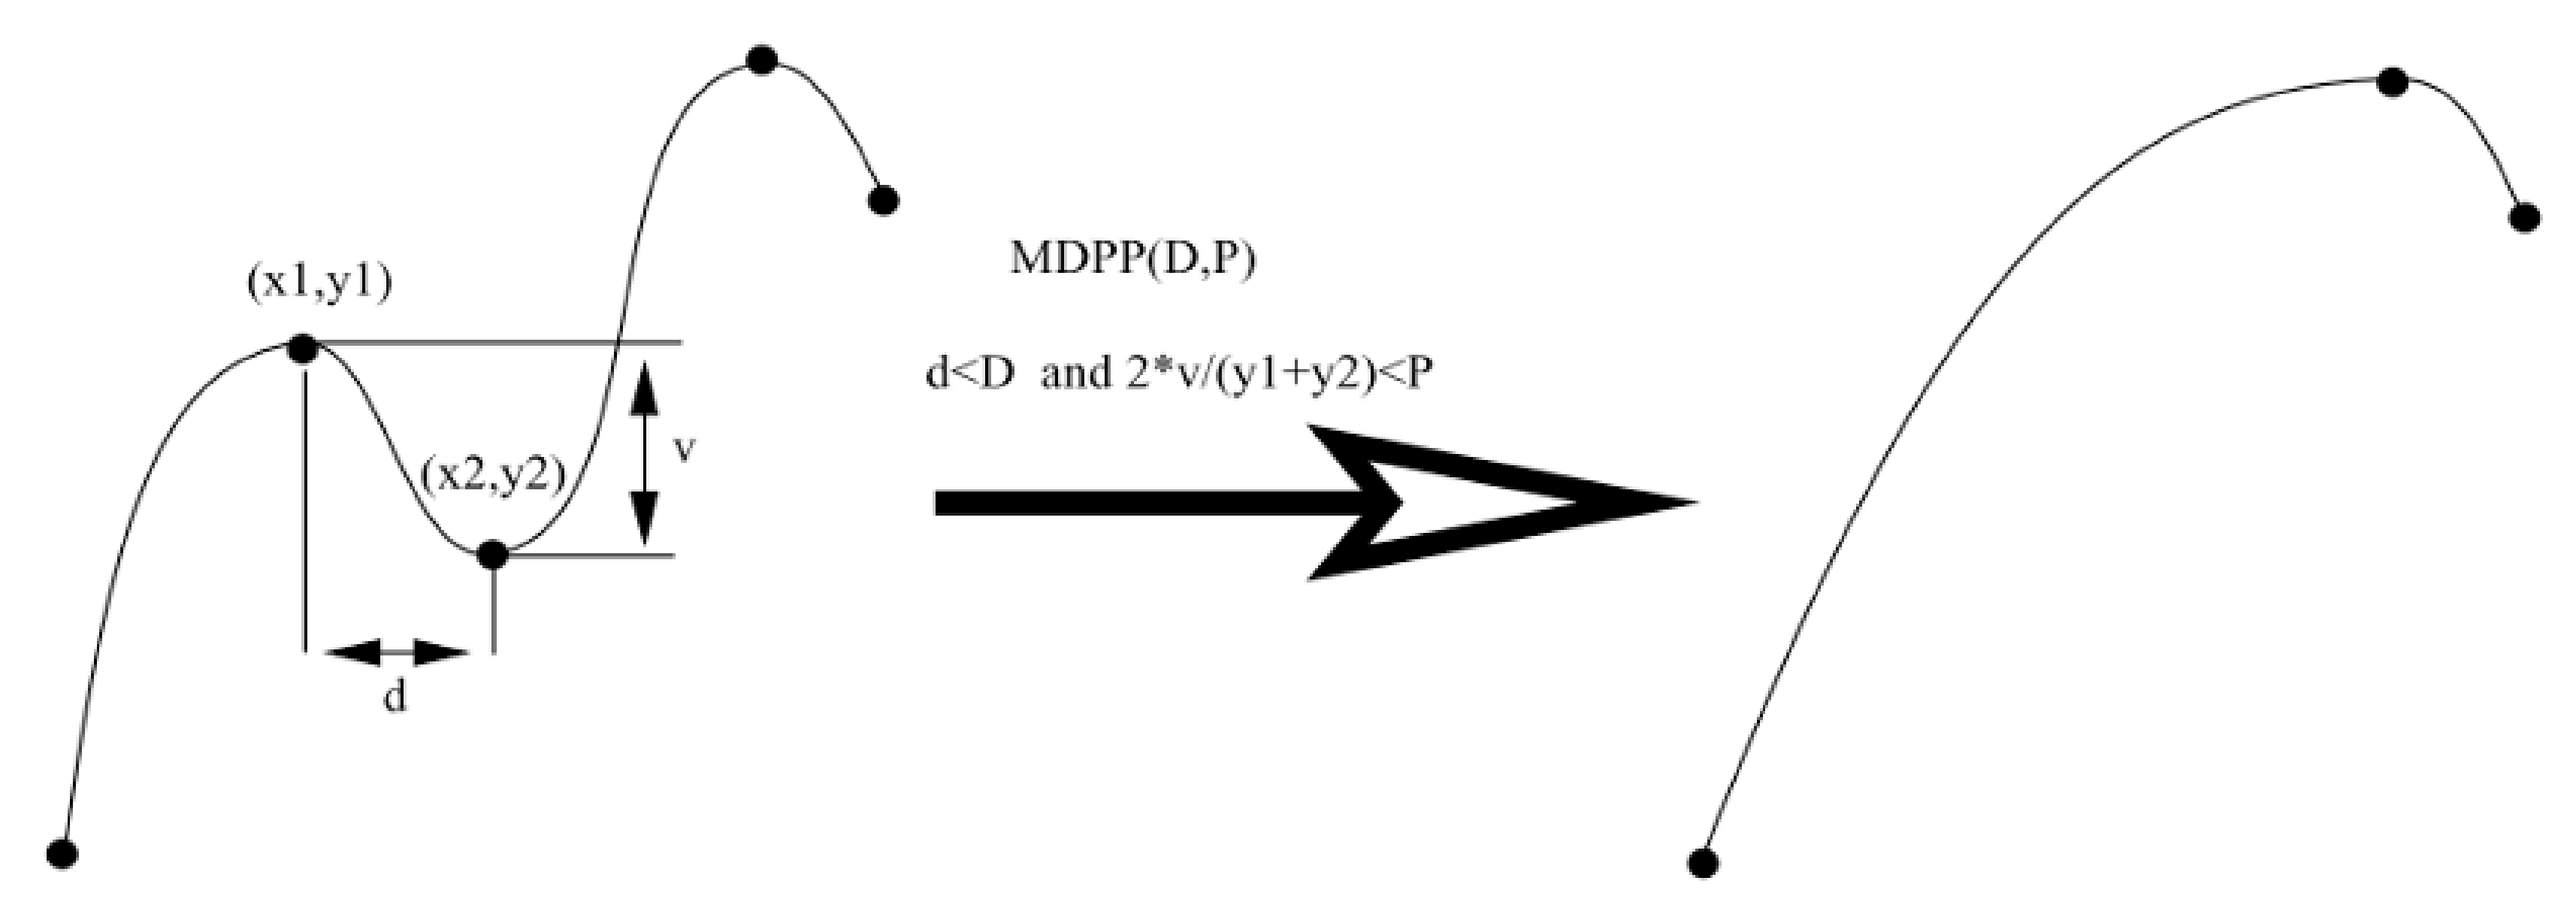

In [ ]:
def MDPP(D, P, df):
    """
    Minimal Distance/Percentage Principle to filter out minor peaks and troughs.
    :param D: minimal distance (in days) between two landmarks
    :param P: minimal percentage difference between two landmarks
    :param df: DataFrame with at least a 'Close' column and DatetimeIndex
    :return: DataFrame with an added 'landmark' column
    """
    df['landmark'] = '-'

    # Identify local maxima (^) and local minima (v)
    df.loc[
        (df['Close'].diff(1) > 0) & (df['Close'].diff(-1) > 0),
        'landmark'
    ] = '^'
    df.loc[
        (df['Close'].diff(1) < 0) & (df['Close'].diff(-1) < 0),
        'landmark'
    ] = 'v'

    # Collect initial landmarks for counting
    d = df[df['landmark'].isin(['^', 'v'])]
    original_landmarks_count = len(d)  # Orange line count before MDPP

    # Apply MDPP filtering
    for i in range(0, len(d) - 2, 2):
        distance_in_days = (d.index[i+1] - d.index[i]).days
        p_value = abs(
            d.loc[d.index[i+1], 'Close'] - d.loc[d.index[i], 'Close']
        ) / (
            (d.loc[d.index[i+1], 'Close'] + d.loc[d.index[i], 'Close']) / 2
        )

        if (distance_in_days < D) and (p_value < P):
            df.loc[d.index[i], 'landmark'] = '-'
            df.loc[d.index[i+1], 'landmark'] = '-'

    # Re-check landmarks after filtering
    final_landmarks = df[df['landmark'].isin(['^', 'v'])]
    final_landmarks_count = len(final_landmarks)  # Blue line count after MDPP

    # Print summary
    print(f"Original landmark count (orange line): {original_landmarks_count}")
    print(f"Final landmark count after MDPP (blue line): {final_landmarks_count}")

    return df


def plot_mdpp_landmarks(df, price_col='Close'):
    """
    Plot the original price series and an MDPP-fitted line
    using the identified landmarks (peaks '^' and troughs 'v').

    :param df: DataFrame containing [price_col, 'landmark']
    :param price_col: Column name with price data (e.g., 'Close')
    """
    df_landmarks = df[df['landmark'].isin(['^', 'v'])].copy()

    plt.figure(figsize=(12, 6))

    # Plot the original price series in orange
    plt.plot(df.index, df[price_col], label='Original', color='blue')

    # Plot the simplified MDPP curve in blue
    plt.plot(df_landmarks.index, df_landmarks[price_col],
             label='MDPP Landmarks', color='orange')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'MDPP Landmarks on {price_col}')
    plt.legend()
    plt.show()

Original landmark count (orange line): 1251
Final landmark count after MDPP (blue line): 383


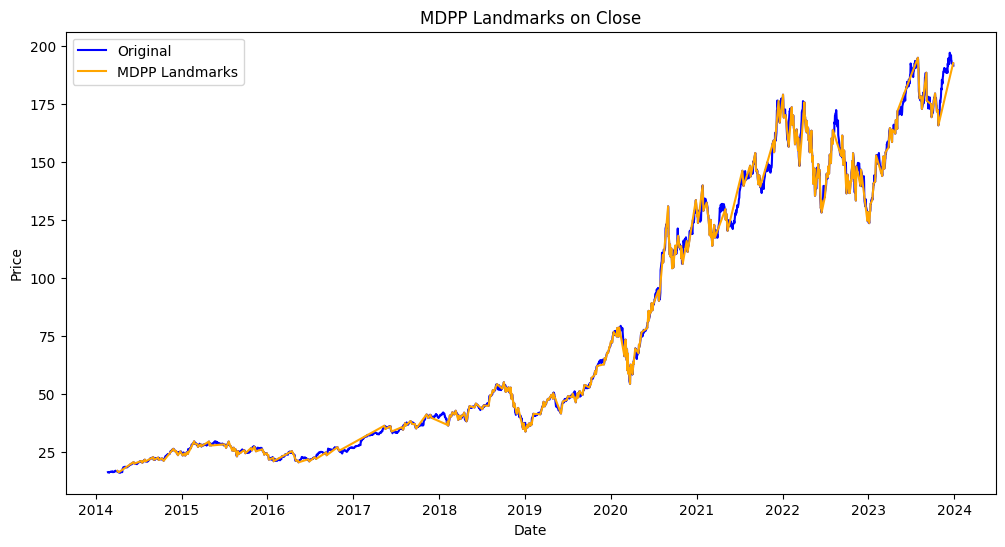

In [ ]:
# === Example Usage (single call) ===
# 1) Apply MDPP
df_mdpp = MDPP(D=10, P=0.03, df=df)

# 2) Plot just once
plot_mdpp_landmarks(df_mdpp, price_col='Close')

In [ ]:
df_mdpp.head()

,Close,High,Low,Open,Volume,RSI_14,MACD,MACD_Signal,MACD_Hist,Open_Growth,Close_Growth,High_Growth,Low_Growth,Volume_Growth,landmark
Date,,,,,,,,,,,,,,,
2014-02-21,16.445496,16.737303,16.425144,16.681571,278784800,45.966828,0.008856,-0.057809,0.066665,-0.000375,-0.011108,-0.004525,-0.008318,-0.088516,-
2014-02-24,16.517511,16.591717,16.356894,16.379750,288909600,47.633397,-0.000986,-0.046445,0.045458,-0.018093,0.004379,-0.008698,-0.004155,0.036318,-
2014-02-25,16.345617,16.580753,16.312429,16.574806,231952000,44.134292,-0.022398,-0.041635,0.019237,0.011908,-0.010407,-0.000661,-0.002718,-0.197147,-
2014-02-26,16.198147,16.437667,16.143355,16.394147,276217200,41.329295,-0.050683,-0.043445,-0.007238,-0.010900,-0.009022,-0.008630,-0.010365,0.190838,-
2014-02-27,16.521267,16.556020,16.157446,16.191574,301882000,48.980594,-0.046490,-0.044054,-0.002436,-0.012356,0.019948,0.007200,0.000873,0.092915,-


In [ ]:
# First, ensure 'ground_truth' is initialized properly:
df_mdpp['ground_truth'] = df_mdpp['landmark'].copy()

# Convert DatetimeIndex to positional index for iteration
for idx in range(len(df_mdpp)):
    landmark = df_mdpp.iloc[idx]['landmark']

    if landmark in ['^', 'v']:
        # Find positional bounds (three rows above and below, within DataFrame bounds)
        start_idx = max(idx - 3, 0)
        end_idx = min(idx + 3, len(df_mdpp) - 1)

        # Assign the landmark value to the expanded range
        df_mdpp.iloc[start_idx:end_idx + 1, df_mdpp.columns.get_loc('ground_truth')] = landmark

In [ ]:
# Save to CSV
csv_filename = "apple_preprocessed_data.csv"
df_mdpp.to_csv(csv_filename)

### 2.5 Data Visualization

Below is a simple helper function (`plot_single_line`) that generates a time-series plot of any specified column in our DataFrame. We use Matplotlib to draw the chosen column (e.g., "High", "Low", "Volume", or "RSI_14") against the date index, allowing us to observe each metric’s variation over time. By calling `plot_single_line` on four different columns, we produce four separate line charts, each highlighting the historical trend of that specific feature.

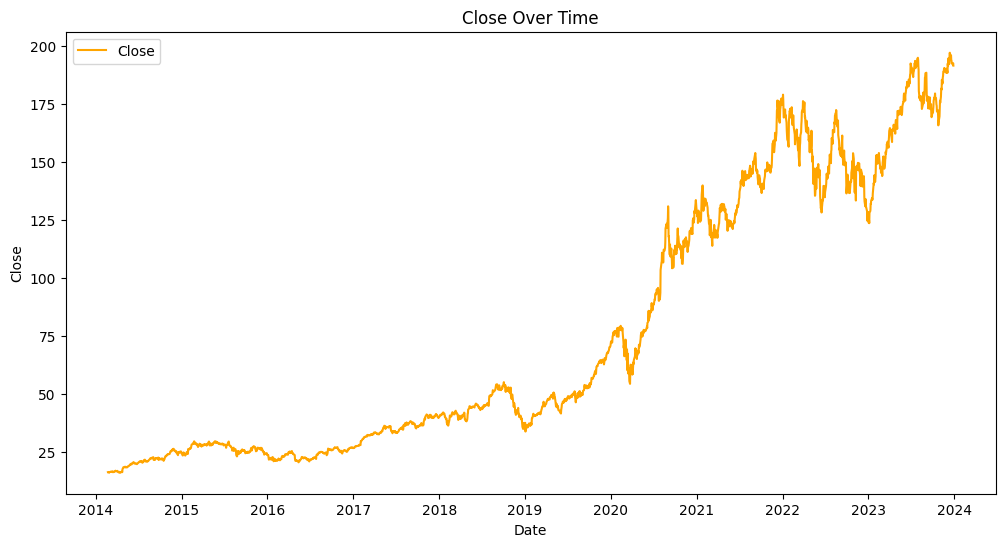

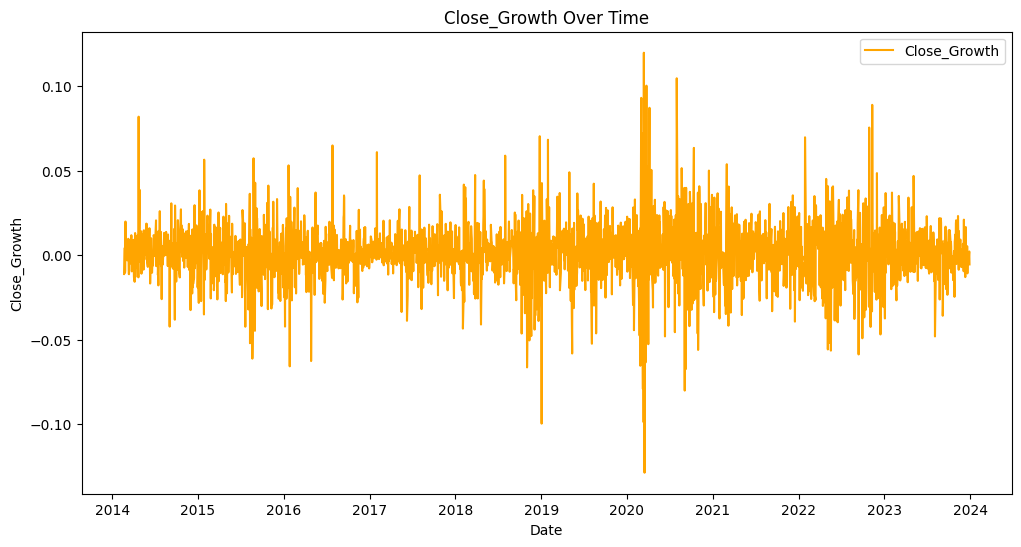

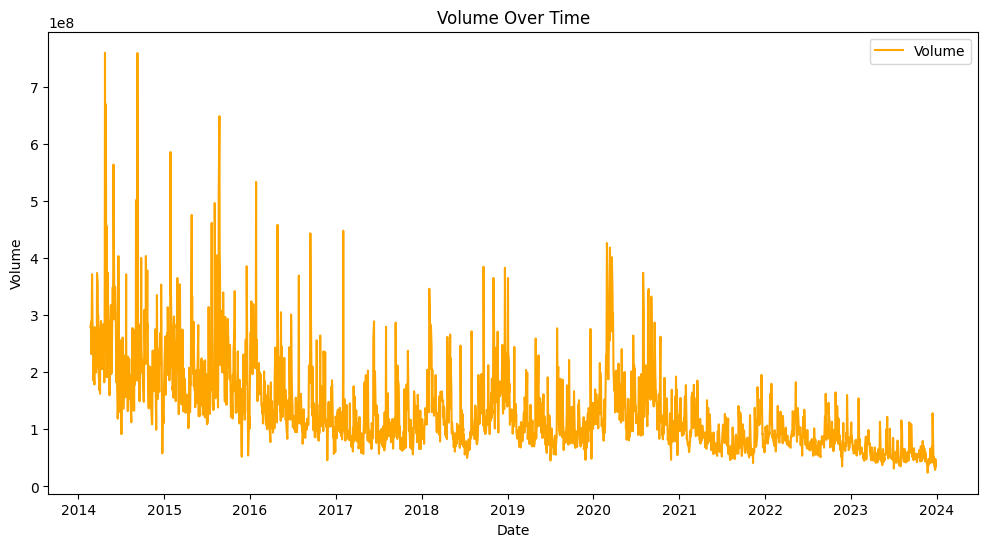

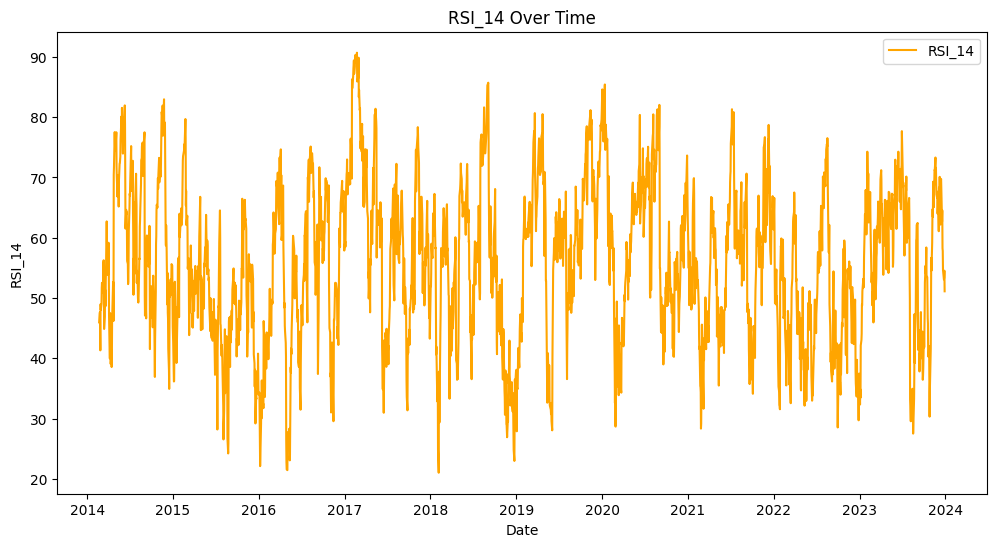

In [ ]:
def plot_single_line(df, column_name):
    """
    Plots a single line chart for the specified column in df.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label=column_name, color='orange')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Over Time')
    plt.legend()
    plt.show()

plot_single_line(df_mdpp, 'Close')
plot_single_line(df_mdpp, 'Close_Growth')
plot_single_line(df_mdpp, 'Volume')
plot_single_line(df_mdpp, 'RSI_14')

# 3. Model Selection

## 3.1 Model Predictive Control (MPC) and Reinforcement Learning (RL) for Decision Making


### 3.1.1 Introduction to MPC
Model Predictive Control (MPC) is a powerful optimization-based control strategy that adaptively controls a system by predicting its future behavior using a known model and solving an optimization problem at each time step. It determines the best sequence of control inputs over a finite prediction horizon while satisfying system constraints. MPC has been widely used in **industrial automation, robotics, and process control** due to its ability to handle **multi-variable systems and constraints** effectively. However, despite its adaptability, MPC is inherently **model-based**, meaning it requires an accurate mathematical representation of the system's dynamics.

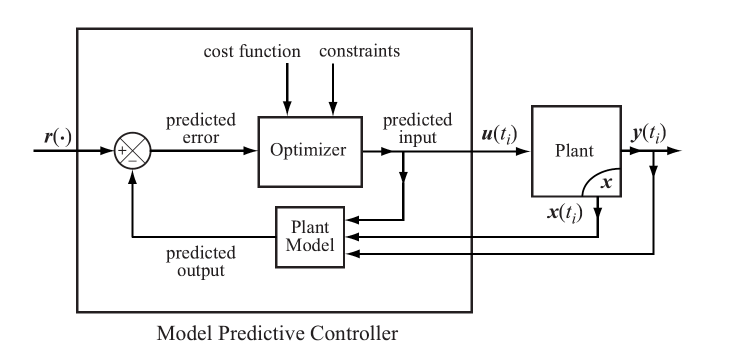

### 3.1.2 Introduction to Reinforcement Learning (RL)
On the other hand, **Reinforcement Learning (RL)** is a machine learning approach that allows an agent to learn an optimal decision-making policy through **trial and error**, without requiring an explicit system model. RL operates by **interacting with the environment**, receiving feedback in the form of rewards, and gradually improving its policy based on experience. **Model-free RL**, in particular, does not assume any prior knowledge of the system's dynamics but instead learns directly from **data**, making it suitable for **complex, high-dimensional, and uncertain environments**.

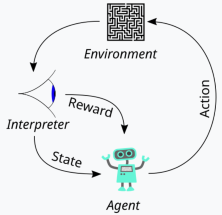

#### \- **Typical RL Framework**

A **Reinforcement Learning (RL) scenario** typically follows this structure:

1. ***Agent*** → Takes actions in an environment.
2. **Environment** → Responds to actions and provides:
   - **Reward** (feedback signal)
   - **State representation** (new observation)
3. **Agent receives feedback** → Uses the reward and new state to improve decision-making.

### 3.1.3 Why Choose Model-Free RL

MPC Faces Challenges in Stock Market Prediction
In the case of financial markets, particularly stock trading, the environment is highly stochastic, non-stationary, and difficult to model explicitly due to: Market fluctuations, Presence of noise, Unforeseen external events (e.g., economic crises, news impact, geopolitical risks). The complexity of the stock market make it challenging to define an accurate mathematical model for MPC to use effectively.

Given these challenges, model-free RL emerges as a more suitable approach for stock market decision-making strategies. Unlike MPC, which depends on a predefined model, RL can adaptively learn optimal trading strategies purely from market data, making it more robust to changing conditions. Through techniques such as:

Deep Q-Networks (DQN)
Proximal Policy Optimization (PPO)
Actor-Critic methods
RL-based trading agents can continuously improve their decision-making process, dynamically adjusting to new market trends.

## 3.2 The framework of stock market trading based on Reinforcement Learning (RL):
## **Stock Market Modeling for Reinforcement Learning**

### **Environment**
**Historical stock data** is used to simulate market conditions.

### **State Representation**
The **current market state**, which may include:
   - Stock prices
   - Technical indicators (e.g., RSI, MACD)

### **Actions**
The agent can take **one of three actions** at each time step:
   - **Buy** → Purchase stocks
   - **Sell** → Sell stocks
   - **Hold** → Do nothing and keep the current portfolio

### **Reward Function**
The **reward** is based on **profit or loss** from the previous action:
   - **Positive Reward** → If the portfolio value increases
   - **Negative Reward** → If the portfolio value decreases

In [ ]:
!pip install gym numpy pandas stable-baselines3 yfinance matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
from gym import spaces

In [ ]:
class StockTradingEnv(gym.Env):
    """Custom Reinforcement Learning environment for stock trading."""

    def __init__(self, ticker="AAPL", start="2020-01-01", end="2023-01-01", initial_balance=10000):
        super(StockTradingEnv, self).__init__()

        # Load historical stock data
        self.df = yf.download(ticker, start=start, end=end)
        self.df = self.df[['Close']]
        self.df.reset_index(inplace=True)

        # Environment settings
        self.initial_balance = initial_balance
        self.current_step = 0
        self.balance = initial_balance
        self.shares_held = 0
        self.total_shares = 0
        self.total_reward = 0

        # Define action and state spaces
        self.action_space = spaces.Discrete(3)  # Buy, Sell, Hold
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(2,), dtype=np.float32)

    def reset(self):
        """Reset the environment at the beginning of each episode."""
        self.current_step = 0
        self.balance = self.initial_balance
        self.shares_held = 0
        self.total_shares = 0
        self.total_reward = 0
        return self._get_observation()

    def _get_observation(self):
        """Return the current state: [Stock Price, Portfolio Value]."""
        price = self.df.iloc[self.current_step]["Close"]
        return np.array([price, self.balance + self.shares_held * price], dtype=np.float32)

    def step(self, action):
        """Take an action (Buy, Sell, Hold) and return the new state, reward, and done flag."""
        done = self.current_step >= len(self.df) - 1
        price = self.df.iloc[self.current_step]["Close"]

        if action == 0:  # Buy
            if self.balance >= price:
                self.shares_held += 1
                self.balance -= price

        elif action == 1:  # Sell
            if self.shares_held > 0:
                self.shares_held -= 1
                self.balance += price

        # Reward: Increase in portfolio value
        new_value = self.balance + self.shares_held * price
        reward = new_value - (self.balance + self.shares_held * price)
        self.total_reward += reward

        # Move to next step
        self.current_step += 1
        return self._get_observation(), reward, done, {}

    def render(self):
        """Print the current trading state."""
        price = self.df.iloc[self.current_step]["Close"]
        print(f"Step: {self.current_step}, Price: {price}, Balance: {self.balance}, Shares Held: {self.shares_held}")

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env

In [ ]:
# Create and vectorize the environment
env = make_vec_env(lambda: StockTradingEnv(), n_envs=1)

# Train the agent using Deep Q-Network (DQN)
model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.0005, buffer_size=50000, batch_size=64, train_freq=1)
model.learn(total_timesteps=100)

# Save the trained model
model.save("stock_trading_dqn")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


ImportError: Missing shimmy installation. You provided an OpenAI Gym environment. Stable-Baselines3 (SB3) has transitioned to using Gymnasium internally. In order to use OpenAI Gym environments with SB3, you need to install shimmy (`pip install 'shimmy>=2.0'`).

In [ ]:
!pip install shimmy

# 4. Next Steps

## Timeline Overview

| **Task**                                        | **Planned Start** | **Planned End** |
|-------------------------------------------------|-------------------|-----------------|
| **4.1 Model Implementation**                    | Mar 24            | Apr 10          |
| **4.2 Model Design: Define Ground Truth Actions** | Apr 10            | Apr 17          |
| **4.3 Risk Management: Learn Hedging Strategies** | Apr 17            | Apr 24          |
| **4.4 Additional Improvements**                  | Apr 24            | Apr 30          |
| **Final Report & Submission**                   | May  1            | May  2          |

---

## 4.1 **Model Implementation: Complete the Coding**

- Finalize the implementation of the **custom stock trading environment** in OpenAI Gym.
- Ensure the RL agent can interact with the environment (states, actions, rewards).
- Train the model using **Deep Q-Network (DQN)** or explore **PPO/A2C** for better performance.
- Test and debug the model to ensure stable training.

---

## 4.2 **Model Design: Define Ground Truth Actions**
### **Ground Truth Action: Market Dynamic Price Points (MDPP)**
To improve the training process, define an **ideal action strategy** based on **Market Dynamic Price Points (MDPP)**:
- Identify **turning points** in the stock price movement.
- Assign **ground truth actions** based on price trend changes:
  - `"^"` → **Sell** at local peaks.
  - `"v"` → **Buy** at local dips.
  - `"-"` → **Hold** when the market is stable.

---

## 4.3 **Risk Management: Learn Hedging Strategies**
### **Can the RL Agent Learn Risk Hedging?**
- Introduce **two correlated stocks** (e.g., AAPL & MSFT) and analyze if the agent can learn to hedge risks.
- Define a **multi-stock trading environment** where:
  - The agent decides trades across **multiple stocks**.
  - The objective includes **portfolio risk minimization**.

---

## 4.4 **Additional Improvements**
- **Feature Engineering**: Incorporate **technical indicators** (RSI, MACD, Bollinger Bands).
- **Hyperparameter Tuning**: Experiment with **learning rates, discount factors, exploration strategies**.
- **Visualization & Performance Analysis**: Compare RL agent performance against **baseline strategies** (e.g., Moving Average, Buy & Hold).